In [89]:
import pandas as pd
import numpy as np
import os
import pathlib
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt

In [90]:
directory_df_root=Path(r"C:\Users\JDBUSTAMANTE\OneDrive - Duratex SA\reports_pre-usos_diligenciamiento_no_cumple\pre_uso_produccion_report_copia\Preusos Producción.xlsx")
df=pd.read_excel(directory_df_root).drop(["Día","Turno","BP2"], axis=1)
df

,Lijadora,Schelling,Moduladora y Carpintería,Astillado,Mantenimiento Mecánico,Formación y Prensa,Refinación,Planta Térmica
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NO,NO,NO,NaN,NaN,NaN,NaN,NaN
2,NO,NO,OK,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NO,NO,OK,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
373,Paro Línea,Paro línea,OK,Paro línea,NO,Paro línea,Paro línea,Paro línea
374,Paro Línea,Paro línea,Paro línea,Paro línea,NO,Paro línea,Paro línea,Paro línea
375,Paro Línea,Paro línea,Paro línea,Paro línea,NO,Paro línea,Paro línea,Paro línea
376,Paro Línea,Paro línea,OK,Paro línea,NO,Paro línea,Paro línea,Paro línea


In [103]:
counts = df.apply(lambda x: x.value_counts(), axis=0).fillna(0)
counts=counts.loc[["OK","NO"],:]
# Calculate cumulative counts
cumulative_counts = counts.sum(axis=1)
# Append cumulative counts to the data
counts['acumulado'] = cumulative_counts
counts

,Lijadora,Schelling,Moduladora y Carpintería,Astillado,Mantenimiento Mecánico,Formación y Prensa,Refinación,Planta Térmica,acumulado
OK,175.0,159.0,202.0,148.0,43.0,67.0,66.0,69.0,929.0
NO,36.0,55.0,29.0,21.0,37.0,18.0,19.0,17.0,232.0


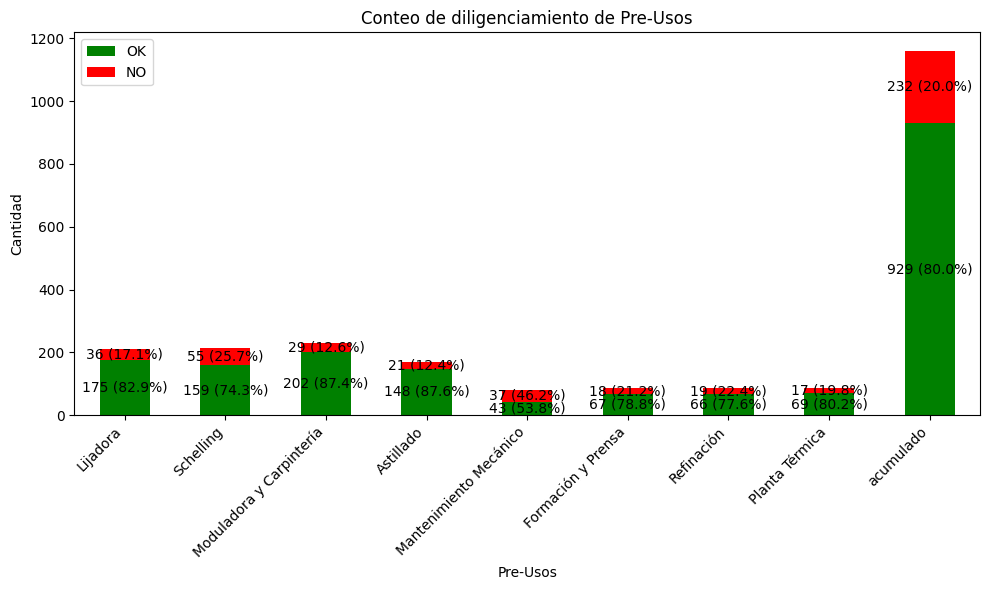

In [131]:
# Plot bar chart
ax = counts.T.plot(kind='bar', stacked=True, color=['green','red'], figsize=(10, 6))
# Add text labels inside bars (count and percentage)
for i, rects in enumerate(ax.containers):
    # Get total height for each bar
    totals = counts.T.sum(axis=1)

    for j, rect in enumerate(rects):
        # Get height of each segment
        height = rect.get_height()
        if height > 0:  # Only label non-zero bars
            # Calculate percentage
            percent = height / totals.iloc[j] * 100

            # Add text (count and percentage)
            ax.text(
                rect.get_x() + rect.get_width() / 2,  # X position (center)
                rect.get_y() + height / 2,            # Y position (center of bar)
                f'{int(height)} ({percent:.1f}%)',    # Text label (count and %)
                ha='center', va='center', fontsize=10, color='black'
            )
# Set labels and title
plt.xlabel("Pre-Usos")
plt.ylabel("Cantidad")
plt.title("Conteo de diligenciamiento de Pre-Usos")

# Adjust x-axis labels to match column names
# Adjust x-axis labels to match column names
plt.xticks(ticks=range(len(counts.columns)), labels=list(df.columns) + ['acumulado'], rotation=45, ha="right")

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.savefig("completions_2024_pre-usos.png")
plt.show()